#**Inferential Statistics**


## Import Package

In [6]:
#Package Import Process
#For basic operations
import numpy as np
import pandas as pd

#For data visualizations, we need to instal dabl first (colab doesnt have this one)
import seaborn as sns
import matplotlib.pyplot as plt
!pip install dabl
import dabl

#For avoiding warnings
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 558 kB 21.7 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


## **Data Exploration**

### 1. Import Data

In [7]:
# Reading data (if error, connect first to gdrive)
data=pd.read_csv('/content/drive/MyDrive/Pelatihan_Data_Science/Day 1/train.csv')

#Check dataset shape (row and column)
data.shape
  ##this data has 1460 row and 81 column

(1460, 81)

### 2. Data Type and Info

In [8]:
#Data type and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Check the head of dataset (top 5)
pd.set_option('max_column', 82)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Create Plot (Sale Price)

Target looks like regression
Showing only top 10 of 22 continuous features
Showing only top 10 of 44 categorical features


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc0f33bc50>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc0d06a5d0>,
       dtype=object)]

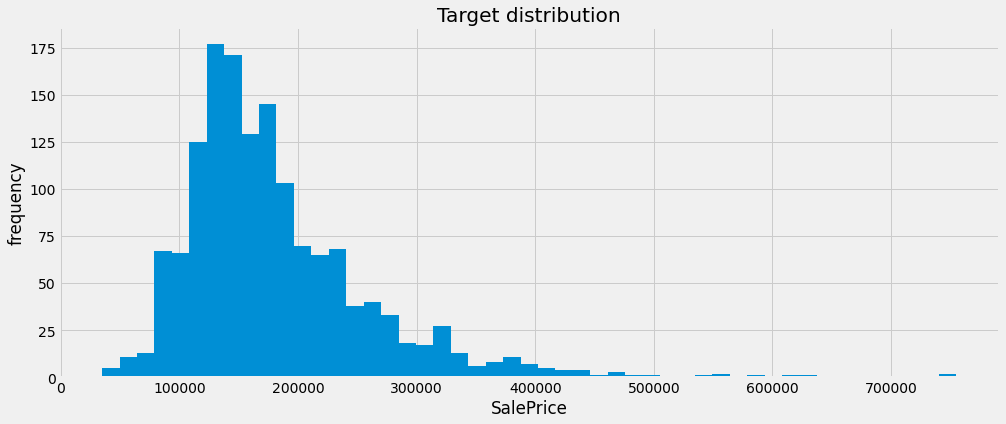

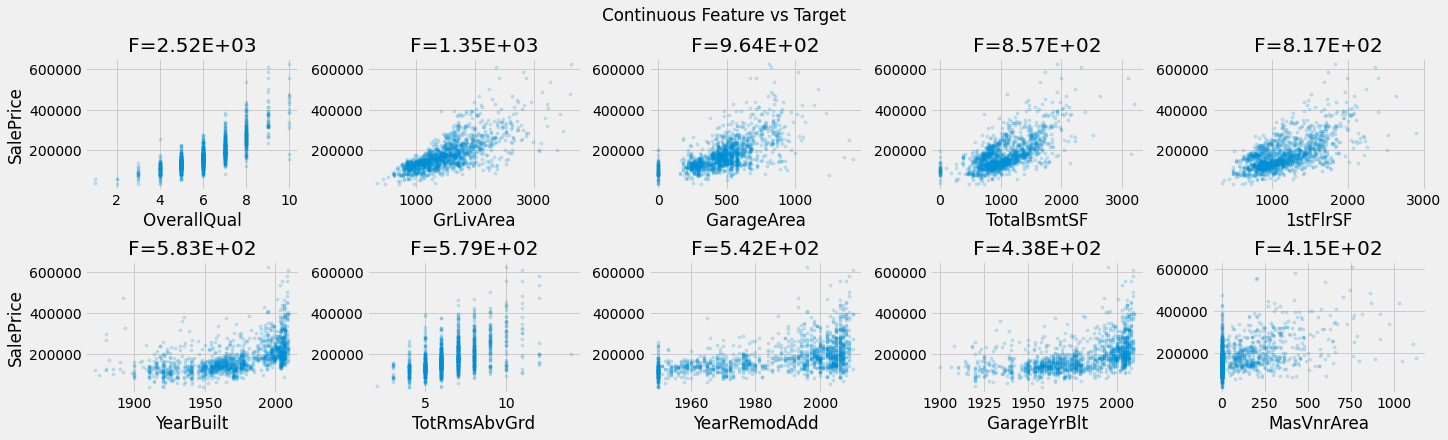

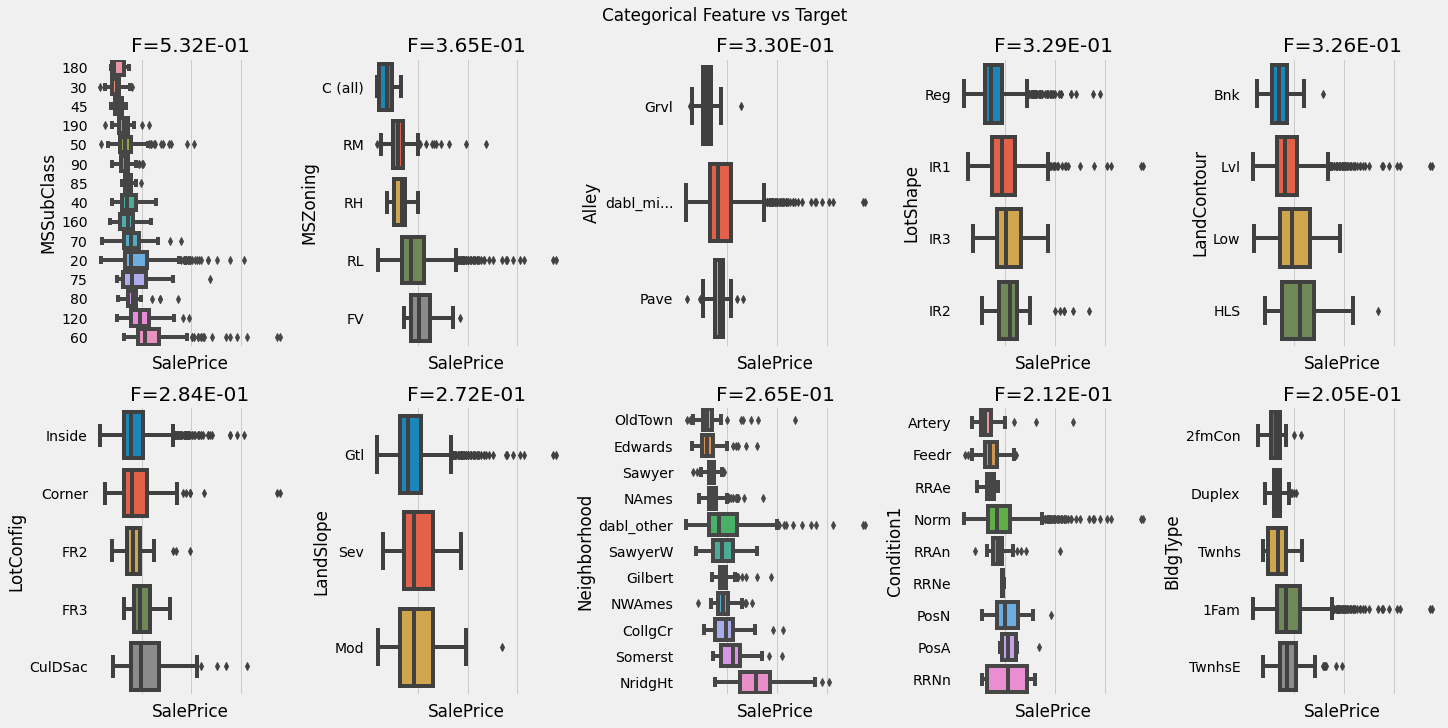

In [10]:
# We can see the correlation between sale price to another variables
 ## We also can interpret sale price in spesific group from boxplot: (example Ms Zoning in FV is more stabil but more expensive too compare with other, and Ms Zoning in RL hasnt stabil saleprice even the price is cheaper than FV)

plt.rcParams['figure.figsize']=(15, 6) ##length 15, width 6
plt.style.use('fivethirtyeight') ##
#Create graph about Saleprice, it will also shows the box plot saleprice to top 10 var 
dabl.plot(data, target_col = 'SalePrice')

## **Probability**

### 1. Probability Picking House in the OldTown

In [11]:
# Find a probability (ex: picking house in the OldTown from a lot of neighborhood)
house_in_OldTown= data[data['Neighborhood']=='OldTown'].shape[0]
all_houses=data.shape[0]
probability=(house_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:2f}'.format(probability)+'%') #print format
  #the number of probability is from OldTown/All Neighborhood --> 113/1460=7.7%

Probability of picking a house in OldTown: 7.739726%


### 2. Probability Picking House in OldTown 2 Times

In [12]:
#Conditional Probability Code (ex: How much prob if First pick OldTown and Second pick OldTown again)
cond_prob=(house_in_OldTown/all_houses) * ((house_in_OldTown - 1)/(all_houses - 1))
print("The probability of picking a house in OldTown and again picking a house from the same neighborhood is {0:.9f}". format(cond_prob*100)+'%')
#(113/1460)*((113-1)/(1460-1))=0.5%

The probability of picking a house in OldTown and again picking a house from the same neighborhood is 0.594139352%


# **Inference**

## Sample Mean and Population Mean

### 1. Sample Mean

In [52]:
# Take seed (to create a constant values for random sampling) ; number is random 
np.random.seed(10)

# Take 500 sample from >1000 resp
sample_1= np.random.choice(a=data['SalePrice'], size=500)

# Mean of the sample
print ("Sample Mean:", sample_1.mean())
  # From 500 samples, we get the average sale price is 180.196 usd


  # Mean of the population (overall resp) --> Just to compare
print ("Population Mean:", data['SalePrice'].mean())
  # From all obs, we get the average sale price is 180,921.1 usd

#We can find average of population if we have population data, but how if we doesnt have it? 

Sample Mean: 183441.382
Population Mean: 180921.19589041095


### 2. Population Mean 

If we have sample data but doesnt have population data
We will calculate confident interval and compare with the actual mean of Sale Price from population

**Import Package**

In [16]:
# Import Package (is mainly used for probabilistic distributions and statistical operations)
import scipy.stats as stats
import math

**Get 1000 sample (random)**

In [17]:
# Take seed (to create a constant values for random sampling) ; number is random 
np.random.seed(15)

In [18]:
# Take sample: example 1000 samples
sample_size=1000
sample = np.random.choice(a=data['SalePrice'], size = sample_size)

In [19]:
# Mean of 1000 samples
sample_mean=sample.mean()
print ("Sample Mean (1000):", sample_mean)

Sample Mean (1000): 178638.333


**Get Z value, SD, ME, and Confident Intv**

In [20]:
# Get Z-critical Value using 5% of error
z_critical=stats.norm.ppf(q=0.95)
print ("Z-Critical Value:",z_critical)
  # Z value is 1.644

Z-Critical Value: 1.6448536269514722


In [21]:
# Get Standart Deviation
pop_stdev=data['SalePrice'].std()
print ("Std:", pop_stdev)

Std: 79442.50288288663


In [22]:
# Get Margin of Error
margin_of_error= z_critical*(pop_stdev/math.sqrt(sample_size))
print("Margin of Error:", margin_of_error)

Margin of Error: 4132.188980333281


In [23]:
# Get Confidence Interval
confident_interval=(sample_mean-margin_of_error, 
                    sample_mean+margin_of_error)
print("Confident Interval:", end=" ")
print(confident_interval)
print("Actual Mean: {}".format(data['SalePrice'].mean()))
  ## The confident interval is beetween 177,453 USD - 185,718 USD--> compare with the population data, we know that the our calculation is correct (actual mean within the confident interval) 

Confident Interval: (174506.14401966674, 182770.5219803333)
Actual Mean: 180921.19589041095


### 3. POPULATION MEAN (25 TIMES REPEAT)

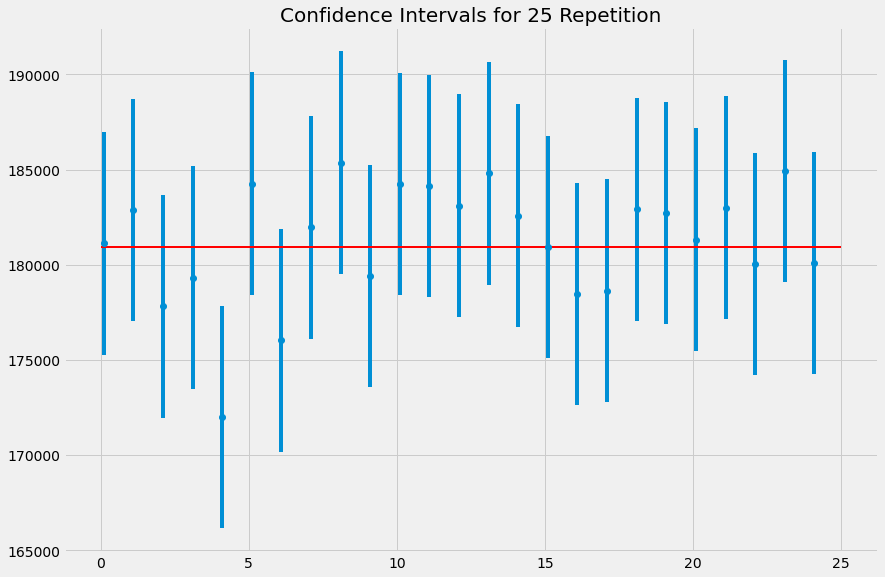

In [50]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value* 
    z_critical = stats.norm.ppf(q = 0.95)         

    # Get the population standard deviation
    pop_stdev = data['SalePrice'].std()  

    stats.norm.ppf(q = 0.05)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Repetition', fontsize = 20)
plt.show()

  ### The red line is the actual mean, and blue is confident interval scale With 25 times repetition, 
  ### more than 90% is correct, just 1/25 is wrong (5th)

### 4. Does the inferential result is near/far with the actual mean?

We will test using z test

In [51]:
# Import z test from statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = data['SalePrice'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

  ## Our measurement is significant with the low level of error (see P-value)

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572
